# Make "red" noise, by specifying the scale for exponential autocorrelation. 

## How do you choose that scale? 
Reasoning: 

Red noise has covariance that drops off exponentially with lag. So if C0 is the variance of the series, and C1 the covariance at a one-step lag, we want to know the value of $\tau_{efold}$ for which $C1/C0 = exp(\delta t / \tau_{efold})$. Solving, $$\tau_{efold} = \delta t /ln(C1/C0) = \delta t /ln(r1)$$ where $r1$ is the *autocorrelation at lag 1.* 

### Work in a pylab session: clean basic tools

In [56]:
# This %pylab magic line loads numpy, scipy, matplotlib. 
# add the word inline to put figures inline
%pylab inline
# plt.xkcd();

Populating the interactive namespace from numpy and matplotlib


From your data (what you are trying to mimic), type 

corrcoef(y, roll(y,1)) 

to see the lag-1 value you need. The function roll(y,1) shifts an array y by one slot periodically. (This is careless about endpoint effects; if your series is short, you should be more careful.) 

In [22]:
# var(y) 
# corrcoef(y, roll(y,1))
# len(y)

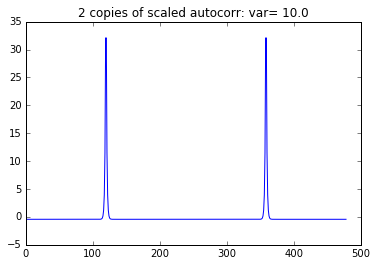

In [188]:
# Let's mimick a data array y, using AR1 red noise. 
# That only depends on autoregression at lag 1 (hence an "AR1 process")

# INPUTS
lag1_autocorr = 0.9  # Read off this value from corrcoef(y, roll(y,1))
variance = 10        # Read off this value from var(y) 
N = 240             # Read off this value from len(y)  



### CALCULATIONS AND PLOTTING
T_efold = 1.0/log(lag1_autocorr) # Units: number of array positions

### MAKE A YAUTO(X) ARRAY WITH THE RIGHT SIZE, VARIANCE, AND SPECTRUM
x = arange(N)              # A simple count array
xpert = x-mean(x)  
yauto = exp(- abs(xpert))  # Autocorrelation
# Scale it to have the given variance
yauto *= sqrt(variance/var(yauto))
# Remove the mean
yauto = detrend(yauto) 

### QUICK PLOT TO SEE IF IT IS SENSIBLE
xx = concatenate([x,x+max(x)])
plot(xx, concatenate([yauto,yauto]))
title('2 copies of scaled autocorr: var='+format(var(yauto),'5.3'));

## Make the complex spectrum, using fft
...normalizing by input series length, since science doesn't want the *values* of spectra to depend on sampling rate (and thus N)

In [189]:
N = len(yauto) 
spec = fft.fft(yauto) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

## Synthesize with smooth red spectrum, random phase. 
Repeated ctrl-enter in the following cell will make one new realization after another to look at. Sobering with respect to monthly climate records in the instrumental era (a few hundred, autocorr = 0.9)

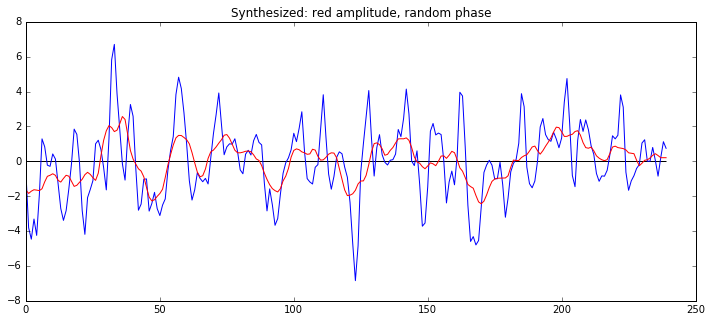

In [257]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase = rand() makes synthetic data
syn_phase = 2*pi*rand( len(phase) )

# Build the synthetic spectrum from real and imaginary parts
# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()

syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part
syn_data = real( ifft(syn_spec)*N )


### PLOT the results
figure(6, figsize=[12,5])
yy = tile(syn_data,2)
# plot(xx,yy)
plot(x, syn_data)

# Overplot a smoothed version
kernel = N/10  # to emphasize lowest frequencies
yysmoo = np.convolve(yy, np.ones((10,))/10, mode='same')
ysmoo = np.convolve(syn_data, np.ones((10,))/10, mode='same')

#plot(xx, yysmoo, 'r', linewidth=3)
plot(x, ysmoo, 'r')

title('Synthesized: red amplitude, random phase');
hlines(0,min(x),max(x));

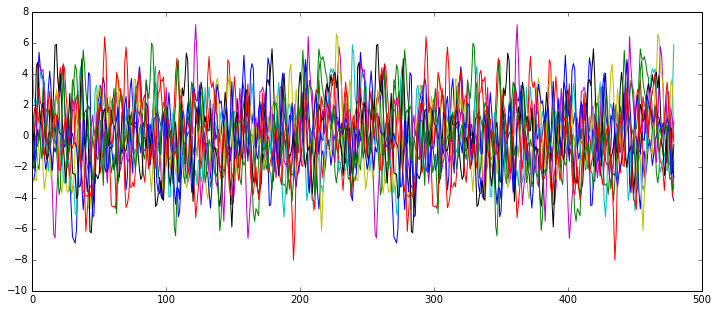

In [199]:
## More realizations with random phases

figure(6, figsize=[12,5])

for i in arange(10): 
    syn_phase = 2*pi*rand( len(phase) )
    
    syn_spec =(    syn_ampli*cos(syn_phase)   #real part
             + 1j* syn_ampli*sin(syn_phase) ) #imag part
    
    syn_data = real( ifft(syn_spec)*N )
    
    plot(tile(syn_data,2),)

### Synthetic data, from an autocorrelation function decay scale